In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
df = pd.read_excel('../Data/monthly_data_total.xlsx')

In [5]:
test_size = 13

In [6]:
df.head()

,Date,Import,Export
0,2006-01-01,12519.71,9143.66
1,2006-02-01,11479.69,8993.29
2,2006-03-01,14314.02,11560.97
3,2006-04-01,12924.18,8624.66
4,2006-05-01,15105.67,10109.30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    169 non-null    datetime64[ns]
 1   Import  169 non-null    float64       
 2   Export  169 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 4.0 KB


In [8]:
df.index = df.Date

In [9]:
df.head()

,Date,Import,Export
Date,,,
2006-01-01,2006-01-01,12519.71,9143.66
2006-02-01,2006-02-01,11479.69,8993.29
2006-03-01,2006-03-01,14314.02,11560.97
2006-04-01,2006-04-01,12924.18,8624.66
2006-05-01,2006-05-01,15105.67,10109.30


In [10]:
df = df[['Import', 'Export']]

In [11]:
df.head()

,Import,Export
Date,,
2006-01-01,12519.71,9143.66
2006-02-01,11479.69,8993.29
2006-03-01,14314.02,11560.97
2006-04-01,12924.18,8624.66
2006-05-01,15105.67,10109.30


In [12]:
df.shape

(169, 2)

In [13]:
df = df.resample('M').sum()

In [14]:
df.shape

(169, 2)

Text(0, 0.5, 'Values in million US $')

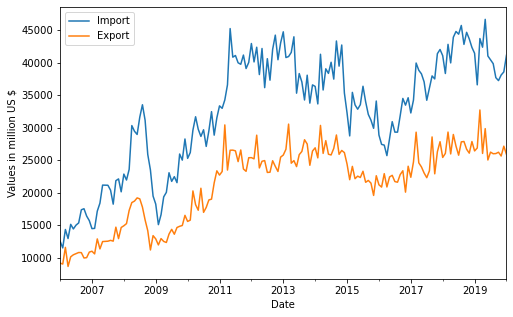

In [15]:
df.plot(figsize = (8,5))
plt.ylabel('Values in million US $')

In [16]:
window  = 12
df['MA_Import']= df['Import'].rolling(window).mean()
df['MA_Export']= df['Export'].rolling(window).mean()

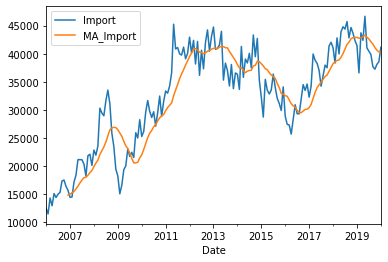

In [17]:
df[['Import', 'MA_Import']].plot()

In [18]:
df['Detrend_Import'] = df['Import']/df['MA_Import']
df['Detrend_Export'] = df['Export']/df['MA_Export']

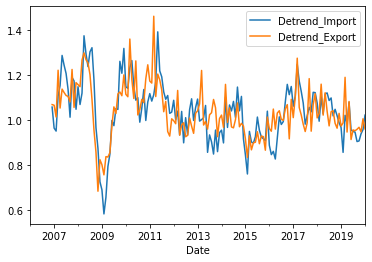

In [19]:
df[['Detrend_Import', 'Detrend_Export']].plot()

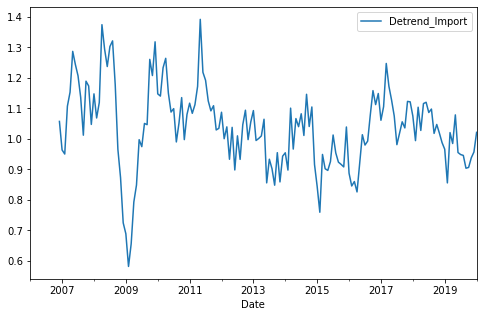

In [20]:
df[['Detrend_Import']].plot(figsize = (8,5))

In [21]:
df.dropna(inplace  = True)

In [22]:
df['Detrend_Import'][0::window]

Date
2006-12-31    1.057162
2007-12-31    1.047333
2008-12-31    0.724712
2009-12-31    1.318101
2010-12-31    1.079663
2011-12-31    1.034593
2012-12-31    1.054959
2013-12-31    0.943187
2014-12-31    0.915949
2015-12-31    1.038917
2016-12-31    1.148642
2017-12-31    1.121332
2018-12-31    0.987672
2019-12-31    0.956957
Freq: 12M, Name: Detrend_Import, dtype: float64

In [23]:
np.nanmean(df['Detrend_Import'][0::window])

1.0306556238592965

In [24]:
# from pandas.core.nanops import nanmean as pd_nanmean
period_averages = [np.nanmean(df['Detrend_Import'][i::window], axis=0) for i in range(window)]

In [25]:
period_averages

[1.0306556238592965,
 1.0038026640482376,
 0.9444326410371482,
 1.0422147581282046,
 1.044493548317447,
 1.0983684782999164,
 1.0513378677571315,
 1.0621949534117563,
 1.0365774128595244,
 1.0308069280857417,
 1.0624905039523027,
 1.0262556363960704]

In [26]:
period_norm_averages = period_averages / np.mean(period_averages, axis=0)

In [27]:
period_norm_averages

array([0.99471083, 0.96879439, 0.91149493, 1.00586684, 1.00806615,
       1.06006216, 1.01467177, 1.02515021, 1.0004261 , 0.99485686,
       1.02543545, 0.9904643 ])

In [28]:
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]

In [29]:
seasonal

array([0.99471083, 0.96879439, 0.91149493, 1.00586684, 1.00806615,
       1.06006216, 1.01467177, 1.02515021, 1.0004261 , 0.99485686,
       1.02543545, 0.9904643 , 0.99471083, 0.96879439, 0.91149493,
       1.00586684, 1.00806615, 1.06006216, 1.01467177, 1.02515021,
       1.0004261 , 0.99485686, 1.02543545, 0.9904643 , 0.99471083,
       0.96879439, 0.91149493, 1.00586684, 1.00806615, 1.06006216,
       1.01467177, 1.02515021, 1.0004261 , 0.99485686, 1.02543545,
       0.9904643 , 0.99471083, 0.96879439, 0.91149493, 1.00586684,
       1.00806615, 1.06006216, 1.01467177, 1.02515021, 1.0004261 ,
       0.99485686, 1.02543545, 0.9904643 , 0.99471083, 0.96879439,
       0.91149493, 1.00586684, 1.00806615, 1.06006216, 1.01467177,
       1.02515021, 1.0004261 , 0.99485686, 1.02543545, 0.9904643 ,
       0.99471083, 0.96879439, 0.91149493, 1.00586684, 1.00806615,
       1.06006216, 1.01467177, 1.02515021, 1.0004261 , 0.99485686,
       1.02543545, 0.9904643 , 0.99471083, 0.96879439, 0.91149

In [30]:
len(seasonal)

158

In [31]:
df['Seasonal_Import'] = seasonal

In [32]:
period_averages = [np.nanmean(df['Detrend_Export'][i::window], axis=0) for i in range(window)]
period_norm_averages = period_averages / np.mean(period_averages, axis=0)
nobs = len(df)
seasonal = np.tile(period_norm_averages.T, nobs // window + 1).T[:nobs]
df['Seasonal_Export'] = seasonal

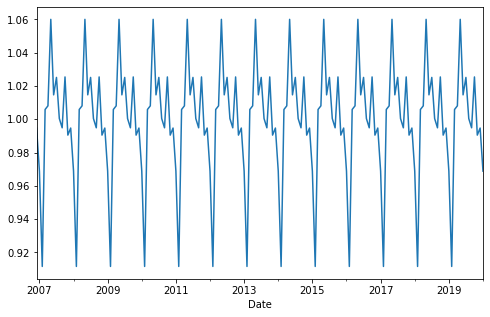

In [33]:
df['Seasonal_Import'].plot(figsize = (8,5))

In [34]:
df['Randomness_Import'] = df['Detrend_Import'] / df['Seasonal_Import']
df['Randomness_Export'] = df['Detrend_Export'] / df['Seasonal_Export']

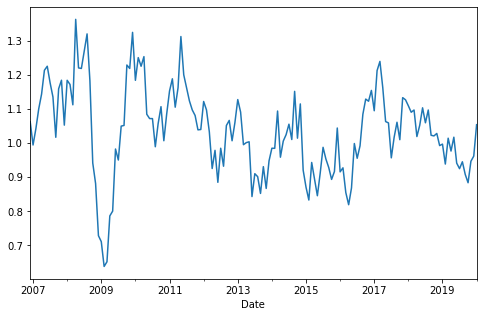

In [35]:
df['Randomness_Import'].plot(figsize = (8,5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11EF7510>,
      dtype=object)

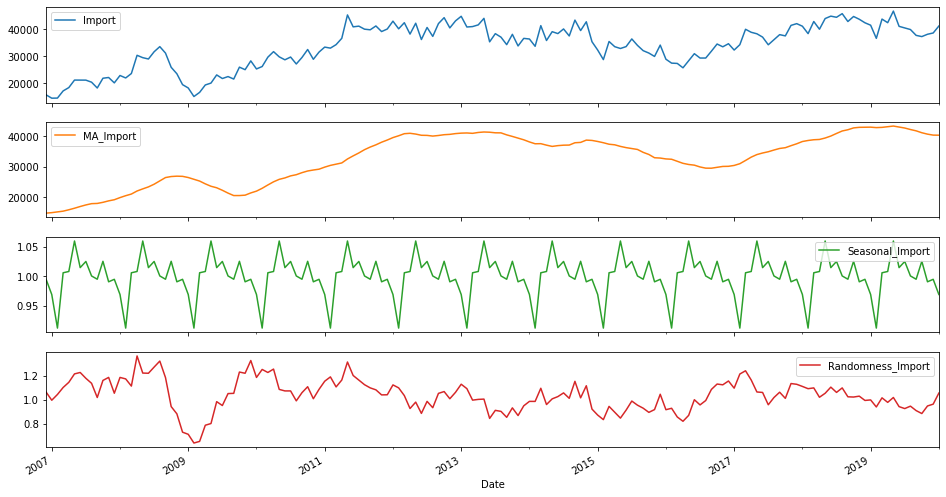

In [36]:
df[['Import', 'MA_Import', 'Seasonal_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

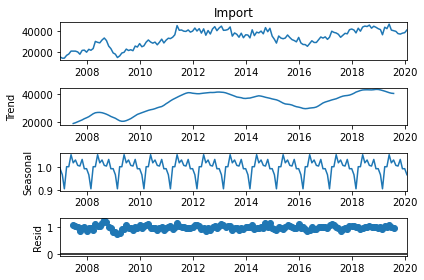

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Import'], model='multiplicative')
result.plot()
plt.show()

## This confirms that our splitting is perfect

array([<matplotlib.axes._subplots.AxesSubplot object at 0x13D64550>,
      dtype=object)

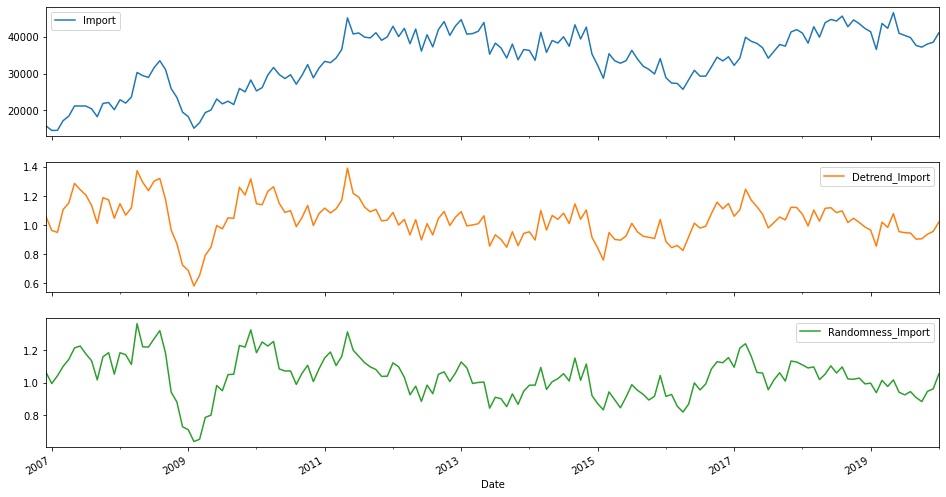

In [38]:
df[['Import', 'Detrend_Import', 'Randomness_Import']].plot(subplots = True, figsize = (16,9))

In [39]:
#define function for ADF test
from statsmodels.tsa.stattools import adfuller
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)


In [40]:
adf_test(df['Randomness_Import'])

Results of Dickey-Fuller Test:
Test Statistic                  -4.795847
p-value                          0.000055
#Lags Used                       4.000000
Number of Observations Used    153.000000
Critical Value (1%)             -3.473830
Critical Value (5%)             -2.880623
Critical Value (10%)            -2.576945
dtype: float64


In [41]:
adf_test(df['Randomness_Export'])

Results of Dickey-Fuller Test:
Test Statistic                  -3.790842
p-value                          0.003002
#Lags Used                       6.000000
Number of Observations Used    151.000000
Critical Value (1%)             -3.474416
Critical Value (5%)             -2.880878
Critical Value (10%)            -2.577081
dtype: float64


## Import Forecast

In [42]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df['Randomness_Import'], nlags=12)
lag_pacf = pacf(df['Randomness_Import'], nlags=12, method='ols')

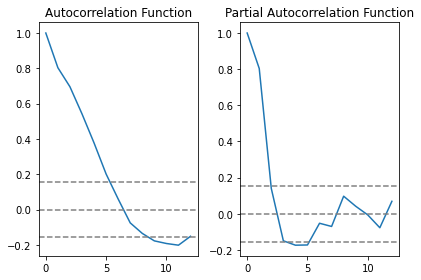

In [43]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [44]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# fit model
model = ARIMA(df['Randomness_Import'][:-test_size], order=(2, 0, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-test_size]), len(df[:-test_size]) + test_size-1)



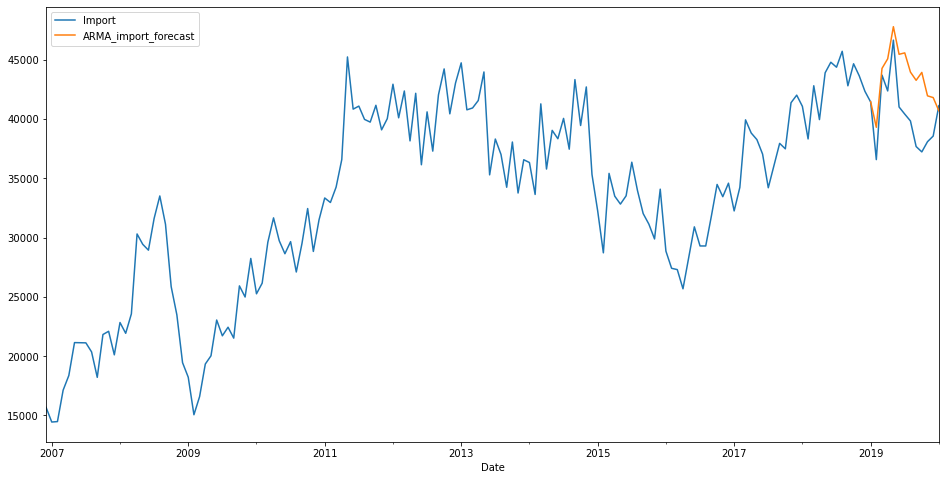

In [45]:
df['ARMA_import_forecast'] = yhat
df['ARMA_import_forecast'] = df['ARMA_import_forecast'] * df['Seasonal_Import'] * df['MA_Import']
df[['Import','ARMA_import_forecast']].plot(figsize = (16,8))

## Export Forecast

In [46]:
lag_acf = acf(df['Randomness_Export'], nlags=12)
lag_pacf = pacf(df['Randomness_Export'], nlags=12, method='ols')

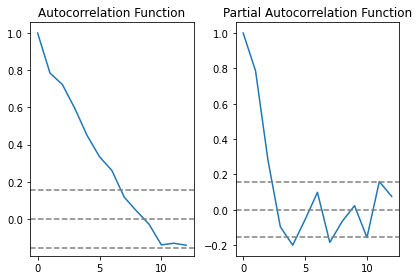

In [47]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(df)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [48]:
# ARMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# fit model
model = ARIMA(df['Randomness_Export'][:-test_size], order=(1, 0, 5))
model_fit = model.fit(disp=False)
# make prediction
yhat = model_fit.predict(len(df[:-test_size]), len(df[:-test_size]) + test_size-1)



In [49]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:      Randomness_Export   No. Observations:                  145
Model:                     ARMA(1, 5)   Log Likelihood                 197.077
Method:                       css-mle   S.D. of innovations              0.062
Date:                Sun, 07 Jun 2020   AIC                           -378.154
Time:                        19:23:08   BIC                           -354.340
Sample:                    12-31-2006   HQIC                          -368.477
                         - 12-31-2018                                         
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       1.0395      0.026     39.283      0.000       0.988       1.091
ar.L1.Randomness_Export     0.7783      0.102      7.601      0.000       0.578       0.979
ma.L1.Randomness_Export    -0.1926      0.128     -1.510      0.131      -0.443       0.057
ma.L2.Randomness_Export     0.2880      0.101      2.865      0.004       0.091       0.485
ma.L3.Randomness_Export     0.0808      0.099      0.813      0.416      -0.114       0.276
ma.L4.Randomness_Export    -0.0427      0.086     -0.498      0.618      -0.210       0.125
ma.L5.Randomness_Export     0.0398      0.098      0.408      0.684      -0.152       0.231
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2849           +0.0000j            1.2849            0.0000
MA.1           -1.9838           -0.0000j            1.9838           -0.5000
MA.2            0.1286           -1.6457j            1.6507           -0.2376
MA.3            0.1286           +1.6457j            1.6507            0.2376
MA.4            1.3988           -1.6396j            2.1552           -0.1376
MA.5            1.3988           +1.6396j            2.1552            0.1376
-----------------------------------------------------------------------------
"""

NormaltestResult(statistic=7.055735515825644, pvalue=0.029367467706146556)


(array([ 3.,  4., 15., 22., 40., 33., 19.,  3.,  2.,  4.]),
 array([-0.1749515 , -0.13799977, -0.10104804, -0.0640963 , -0.02714457,
         0.00980717,  0.0467589 ,  0.08371063,  0.12066237,  0.1576141 ,
         0.19456583]),
 <a list of 10 Patch objects>)

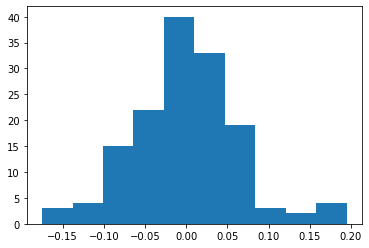

In [50]:
from scipy.stats import normaltest
resid = model_fit.resid
print(normaltest(resid))
plt.hist(resid)

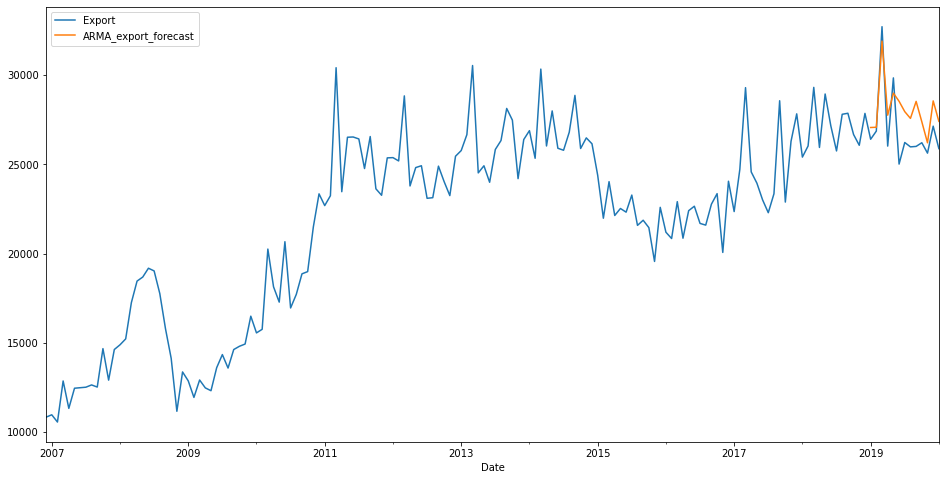

In [51]:
df['ARMA_export_forecast'] = yhat
df['ARMA_export_forecast'] = df['ARMA_export_forecast'] * df['Seasonal_Export'] * df['MA_Export']
df[['Export','ARMA_export_forecast']].plot(figsize = (16,8))

## Error

In [52]:
def rmse(predictions, targets): 
  return np.sqrt(((predictions - targets) ** 2).mean())

In [53]:
rmse(df['Import'][-test_size:], df['ARMA_import_forecast'][-test_size:]).round(2), rmse(df['Export'][-test_size:], df['ARMA_export_forecast'][-test_size:]).round(2)

(3739.46, 1646.06)

In [54]:
%matplotlib notebook

<IPython.core.display.Javascript object>


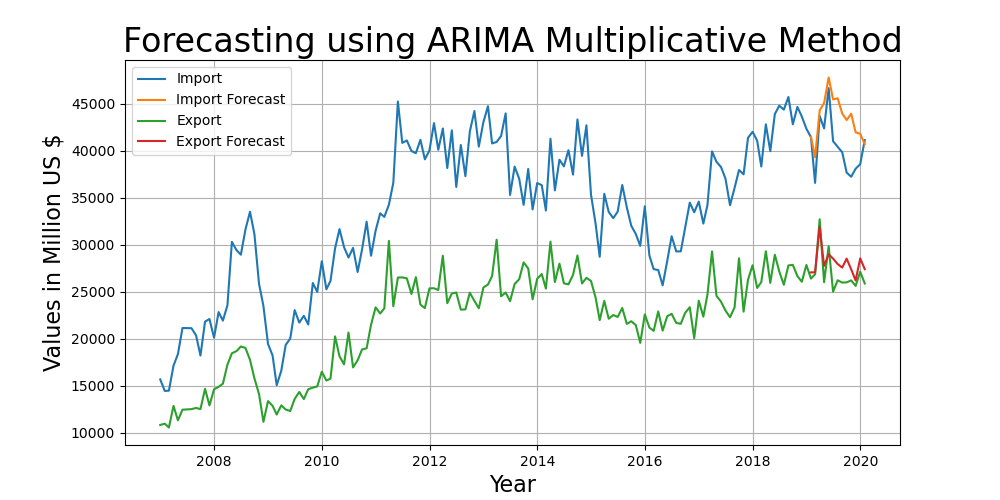

In [55]:
plt.figure(figsize=(10,5))
plt.plot( df['Import'], label='Import')
plt.plot( df['ARMA_import_forecast'], label='Import Forecast')
plt.plot( df['Export'], label='Export')
plt.plot( df['ARMA_export_forecast'], label='Export Forecast')
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Values in Million US $', fontsize = 16)
plt.title('Forecasting using ARIMA Multiplicative Method', fontsize = 24)
plt.grid()
plt.legend()
plt.show()